# neural network building and training

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#feed forward neural network. with two hidden layer.


In [2]:
class model(nn.Module):
    #input layer(4features of the flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))#rectified linear unit
        x = F.relu(self.fc2(x))   
        x = self.out(x)

        return x
    
torch.manual_seed(38) #picking a manual seed for randomizaation
# if loss eval is bad bw test and train, we reduce the seed no. it worked

mod = model()



In [3]:
#print(model)
csv_path = r"C:\Programming\Projects\Learn\pytorch\archive\Iris.csv"
df = pd.read_csv(csv_path)

df['Species'] = df['Species'].replace('Iris-setosa', 0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1)
df['Species'] = df['Species'].replace('Iris-virginica', 2)

#print(df.head)



C:\Users\jai19\AppData\Local\Temp\ipykernel_14444\2293203200.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace('Iris-virginica', 2)


In [4]:
# train test and split now
X=df.drop(['Id','Species'], axis=1)
y=df['Species']

X = X.values
y = y.values

#print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=38)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)#y and x labels to tensors.
y_test = torch.LongTensor(y_test)



In [5]:
#criteria to measure the error
criterion = nn.CrossEntropyLoss()
#adam optimizer
optimizer = torch.optim.Adam(mod.parameters(), lr=0.01)

#print(mod.parameters)



In [6]:
#train the model.
epochs=100
losses = []
for i in range(epochs):
    y_pred = mod.forward(X_train) # go forward and predict
    loss =criterion(y_pred, y_train) #predicted vs y_train
    losses.append(loss.detach().numpy())#keeping track 
    if i%10==0:
        print(f'Epoch:{i} and loss: {loss}') #print every ten epochs
    # back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch:0 and loss: 1.0538495779037476
Epoch:10 and loss: 0.8391748070716858
Epoch:20 and loss: 0.6267265677452087
Epoch:30 and loss: 0.4315229058265686
Epoch:40 and loss: 0.28263550996780396
Epoch:50 and loss: 0.16735820472240448
Epoch:60 and loss: 0.10615809261798859
Epoch:70 and loss: 0.0816061794757843
Epoch:80 and loss: 0.07143925130367279
Epoch:90 and loss: 0.06650254130363464


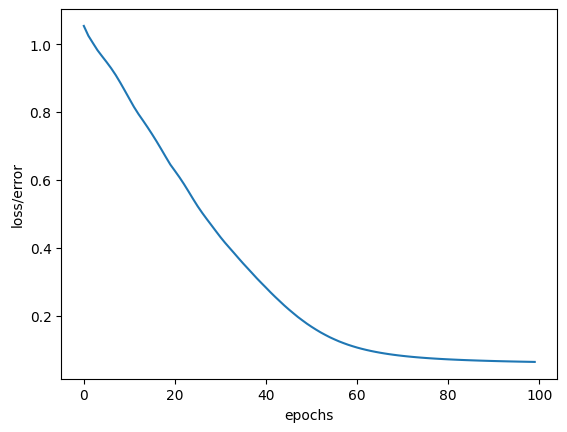

In [7]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")
plt.show()

# ` eval starts here `

In [8]:
# eval of the model on test
with torch.no_grad(): #will turn of back propogation
    y_eval = mod.forward(X_test) #y_eval will be predictions
    loss = criterion(y_eval, y_test) #error findings
    

In [9]:
loss

tensor(0.0382)

In [10]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val= mod.forward(data)

        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} ')

        if y_val.argmax().item()== y_test[i]:
            correct += 1
        
print(f'we got :', {correct})

1.) tensor([ 7.1239,  0.1345, -9.7290]) 	 0 	 0 
2.) tensor([-7.5654,  2.3986,  9.9206]) 	 2 	 2 
3.) tensor([-6.9469,  3.1416,  8.2306]) 	 2 	 2 
4.) tensor([ 6.2131,  0.6162, -8.9109]) 	 0 	 0 
5.) tensor([-6.8669,  2.8075,  8.4261]) 	 2 	 2 
6.) tensor([-2.2439,  5.4066, -1.3528]) 	 1 	 1 
7.) tensor([-1.3405,  4.6960, -2.0742]) 	 1 	 1 
8.) tensor([-8.8042,  3.2556, 11.0437]) 	 2 	 2 
9.) tensor([-3.5129,  4.5641,  1.4519]) 	 1 	 1 
10.) tensor([-7.3472,  2.9740,  9.0140]) 	 2 	 2 
11.) tensor([ 7.3228,  0.1145, -9.9830]) 	 0 	 0 
12.) tensor([-8.5547,  3.3263, 10.5877]) 	 2 	 2 
13.) tensor([-3.1832,  4.9095,  0.6074]) 	 1 	 1 
14.) tensor([-3.2136,  5.0382,  0.5267]) 	 1 	 1 
15.) tensor([-4.8877,  3.8696,  4.2877]) 	 1 	 2 
16.) tensor([-8.4127,  2.8319, 10.8346]) 	 2 	 2 
17.) tensor([-3.2143,  4.1949,  1.3352]) 	 1 	 1 
18.) tensor([-6.8344,  2.8831,  8.2881]) 	 2 	 2 
19.) tensor([-9.6011,  2.7458, 12.7827]) 	 2 	 2 
20.) tensor([-8.7070,  2.8878, 11.2482]) 	 2 	 2 
21.) tens

done

# feeding new data 


In [11]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [12]:
with torch.no_grad():
    print(mod(new_iris))

tensor([ 6.4848,  0.1319, -8.8422])


# metrics

In [13]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:

mod.eval()
with torch.no_grad():
    logits = mod(X_test)
    preds=torch.argmax(logits, dim=1).numpy()
    y_true = y_test.numpy() if hasattr(y_test, "numpy") else y_test

In [15]:
acc = (preds == y_true).mean()
print(f"test accuracy: {acc:.4f}")

test accuracy: 0.9667


In [16]:
cm = confusion_matrix(y_true, preds)
print("confusion matrix", cm)

confusion matrix [[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]


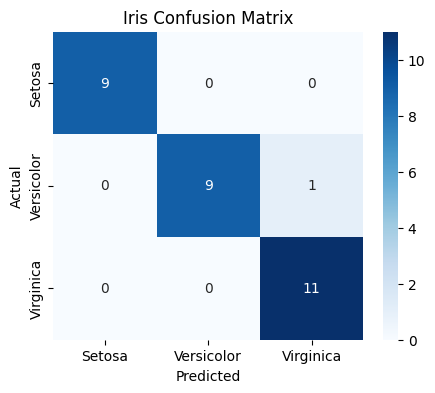

In [17]:
# plotting a confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Setosa","Versicolor","Virginica"],
            yticklabels=["Setosa","Versicolor","Virginica"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Iris Confusion Matrix")
plt.show()

In [18]:
print("\nClassification Report:\n", classification_report(y_true, preds, target_names=["Setosa","Versicolor","Virginica"]))


Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Saving the model

In [19]:
torch.save(mod.state_dict(), 'iris_model.pt')